# 1.CSV読み込み

In [199]:
# グラフをインライン表示に
%matplotlib inline

# 描画ライブラリ
import matplotlib
import matplotlib.pyplot as plt

# 数値計算ライブラリ
import numpy as np

# データ解析支援ライブラリ
import pandas as pd

# 日付ライブラリ
import datetime as dt

# CSVファイルを読み込み
df = pd.read_csv("328844.csv",
                 header=0,
                 parse_dates=True,
                 index_col='date', # indexとするカラム名
                )

# 読み込んだCSVファイルの中身
df

,sales
date,
2014-01-01,0
2014-01-02,0
2014-01-03,0
2014-01-04,0
2014-01-05,0
2014-01-06,0
2014-01-07,0
2014-01-08,0
2014-01-09,0


# 2.データを月別に集計

In [200]:
year = []
month = []
day = []
yyyymm = []

# 各行のindexとその行を表すSeriesオブジェクトを順番に取得
for index, line in df.iterrows():
    # indexに格納している日付を文字列型で取得
    ymd = str(index)
    # 日付のパーツを抜き出し
    year.append(ymd[0:4])
    month.append(ymd[5:7])
    day.append(ymd[5:7])
    yyyymm.append(ymd[:7])

# DataFrameに列を追加    
df['year'] = year
df['month'] = month
df['day'] = day
df['yyyymm'] = yyyymm

# yyyymm列の値ごとに、sales列の値を合計する (Seriesオブジェクト)
monthly_sales = df.groupby('yyyymm')['sales'].sum()

# SeriesオブジェクトからDataFrameを作成
summary = pd.DataFrame({'monthly_sales':monthly_sales})

# 集計結果を表示
summary

,monthly_sales
yyyymm,
2014-01,0
2014-02,10
2014-03,29
2014-04,37
2014-05,36
2014-06,14
2014-07,32
2014-08,33
2014-09,18


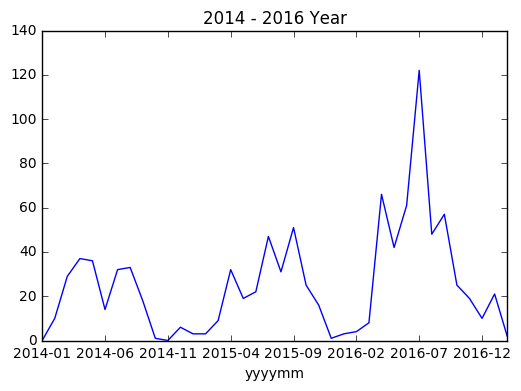

In [201]:
# 月別の販売個数をグラフに描画
summary['monthly_sales'].plot(title="2014 - 2016 Year")

# 3.データを年別に集計

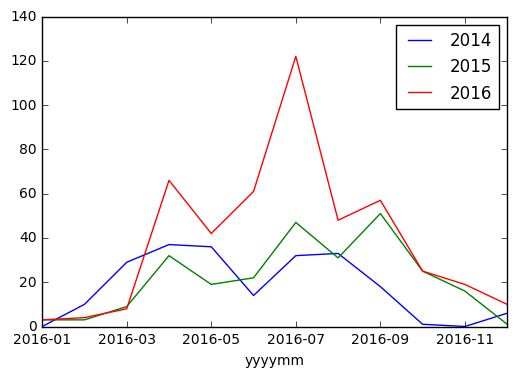

In [202]:
# 年別にデータを分割
summary_2014 = summary['2014-01':'2014-12']
summary_2015 = summary['2015-01':'2015-12']
summary_2016 = summary['2016-01':'2016-12']

# 年別グラフを描画
summary_2014['monthly_sales'].plot(label="2014")
summary_2015['monthly_sales'].plot(label="2015")
summary_2016['monthly_sales'].plot(label="2016")

# 判例を描画
plt.legend()

# 4.2014年のデータで予測

In [203]:
# 0だとエラーになるので、販売個数を +100
summary_2014['monthly_sales+100'] = summary_2014.loc[:, "monthly_sales"] + 100

# log(対数)値の計算結果を列に追加
summary_2014.loc[:, "log"] = np.log(summary_2014.loc[:, "monthly_sales+100"])

# DataFrameを表示
summary_2014

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

,monthly_sales,monthly_sales+100,log
yyyymm,,,
2014-01,0,100,4.605170
2014-02,10,110,4.700480
2014-03,29,129,4.859812
2014-04,37,137,4.919981
2014-05,36,136,4.912655
2014-06,14,114,4.736198
2014-07,32,132,4.882802
2014-08,33,133,4.890349
2014-09,18,118,4.770685


In [204]:
# indexの型を Timestampに
summary_2014.index = pd.to_datetime(summary_2014.index)

# データ型の確認
type(summary_2014.index[10])

pandas.tslib.Timestamp

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


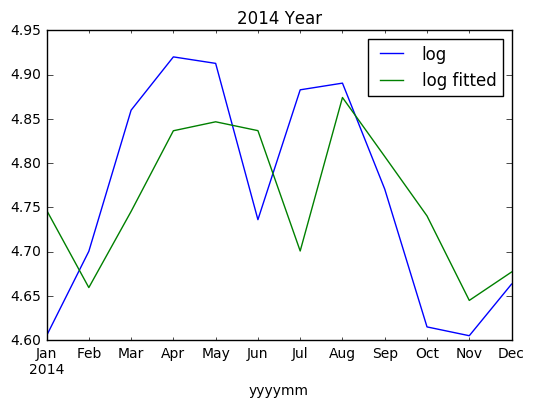

In [205]:
# ARMAモデル
from statsmodels.tsa import arima_model

# モデル作成
model = arima_model.ARMA(summary_2014["log"], order=(1,1))
results = model.fit()

# モデルの適用結果を列に追加
summary_2014.loc[:,"log fitted"] = None
summary_2014.loc[:,"log fitted"] = results.fittedvalues

# グラフ描画（どれぐらい合っているか）
summary_2014.loc[:,["log","log fitted"]].plot(title="2014 Year")

# 5.12カ月後までの販売数を予測

In [206]:
# 今後 12か月の予測値 (monthlyデータなので)
results.forecast(steps = 12)

(array([ 4.70992155,  4.73307028,  4.74175041,  4.74500521,  4.74622566,
         4.7466833 ,  4.7468549 ,  4.74691925,  4.74694338,  4.74695242,
         4.74695582,  4.74695709]),
 array([ 0.09113815,  0.11636429,  0.11948488,  0.11991713,  0.11997778,
         0.11998631,  0.11998751,  0.11998768,  0.1199877 ,  0.1199877 ,
         0.1199877 ,  0.1199877 ]),
 array([[ 4.53129405,  4.88854905],
        [ 4.50500047,  4.9611401 ],
        [ 4.50756435,  4.97593646],
        [ 4.50997195,  4.98003847],
        [ 4.51107353,  4.9813778 ],
        [ 4.51151446,  4.98185215],
        [ 4.51168371,  4.9820261 ],
        [ 4.51174772,  4.98209077],
        [ 4.5117718 ,  4.98211495],
        [ 4.51178085,  4.982124  ],
        [ 4.51178424,  4.9821274 ],
        [ 4.51178551,  4.98212867]]))

In [207]:
# 予測値(log値)を元の数字に戻す
log_pred,_,_ = results.forecast(steps = 12)
pred = np.exp(log_pred)

# Numpy Arrayを表示
pred

array([ 111.04344811,  113.64394655,  114.63468345,  115.0084043 ,
        115.14885292,  115.20156139,  115.22133179,  115.22874601,
        115.23152625,  115.23256878,  115.23295971,  115.23310629])

In [208]:
# 販売個数+100 しているので、元の値に戻す
sales = np.array([])
for item in pred:
    sales = np.append(sales, item - 100)

# Numpy Arrayを表示
sales

array([ 11.04344811,  13.64394655,  14.63468345,  15.0084043 ,
        15.14885292,  15.20156139,  15.22133179,  15.22874601,
        15.23152625,  15.23256878,  15.23295971,  15.23310629])

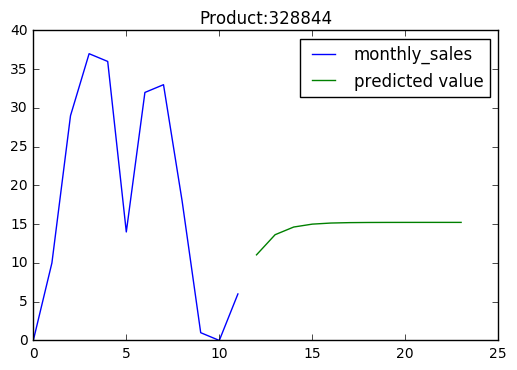

In [210]:
# DataFrameの数
n = len(summary_2014)

# グラフのタイトル
plt.title('Product:328844')

# 販売個数を描画
plt.plot(range(n), summary_2014["monthly_sales"].values, label="monthly_sales")

# 12か月後までの今後の予測値を描画
plt.plot(range(n, n + 12), sales, label="predicted value")

# 判例を描画
plt.legend()